<a href="https://colab.research.google.com/github/eatidal/SDA-Data-Science-Bootcamp-Final-Project/blob/main/HR_Analytics_Job_Change_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><H1>HR Analytics: Job Change Prediction</H1></center>

**Intro**:
The situation set up by the data set is that a company which is active in the Big Data and Data Analysis space is offer in courses to some of its employees. The company is offer paid training to their employees. Fortunately, many employees have signed up for these paid job trainings. However, they have been running into the situation where upon finishing a course they end up switching companies.
Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. The provide dataset encapsulates a number of measured factors such as the number of the training being offered, the education level of the candidate, the developement index of the city for which the company is located, ext ... The data was collected with idea that it could posible to predict whether or not a person is going to leave the company right after completing the paid training.

**The goal**: Is determine of these candidates are really wants to work for the company after training or looking for a new employment and create human understandible insights. 

# Packages

In [17]:
# Standard Imports
import pandas as pd # linear algebra
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv)

# Plot graph
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from google.colab import files

# Packages for Data Preprocessing
import copy
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# Packages for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Packages for Models
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#  Import Data and look at the data

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/eatidal/SDA-Data-Science-Bootcamp-Final-Project/main/Data.csv")
df.head() #First 5 rows

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [19]:
# Data shape
df.shape

(19158, 14)

**Data contains 19158 Observation and 14 Features.**
> Features
* enrollee_id : Unique ID for candidate 
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

**Target is** (target)

# Exploratory Data Analysis(EDA)

In [20]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [21]:
# Describing a non Numerical Data
df.describe(exclude=[np.number])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [22]:
# Describing a Numerical Data
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.


Ordinal variables like:
* education_level
* experience
* company_size
* last_new_job



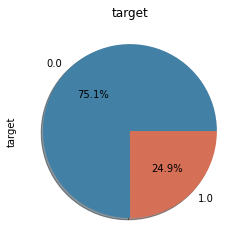

In [23]:
# Plot of Target
plt.figure(figsize=(4,4))
df['target'].value_counts().plot.pie(autopct='%1.1f%%',title ='target',shadow=True,colors=['#4380a5' ,'#d56f56']);
#files.download("abc.png")

In [24]:
# Plotly code to make interactive plot
def pietrace(df, col_name=None,title=None):
    value_st=df[col_name].loc[df['target']==0.0].value_counts() 
    value_ng=df[col_name].loc[df['target']==1.0].value_counts()
        
    # Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=list(value_st.index),values=list(value_st.values), 
                         scalegroup='one',name="stay in job"),1, 1)
    fig.add_trace(go.Pie(labels=list(value_ng.index), values=list(value_ng.values),
                         scalegroup='one',name="change in job"),1, 2)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.4, hoverinfo="label+value+percent+name")
   
    fig.update_layout(title_text=title,
        # Add annotations in the center of the donut pies.
        annotations=[dict(text='Stay', x=0.20, y=0.5, font_size=13, showarrow=False),
                     dict(text='Change', x=0.80, y=0.5, font_size=11, showarrow=False)])
    fig.update_yaxes(automargin=True)                   
    return fig.show()

In [25]:
print("Number of Missing Values in Gender: ", df['gender'].isna().sum())
pietrace(df=df, col_name='gender',title="Men vs women:Who will change job more!")

Number of Missing Values in Gender:  4508


* From the Above Two Plots , We can see there are approx 75% number of employees which are not looking for job change that of rows as '0' , Whereas 25%  looking for a job change that of rows as '1' .
* So , probablity is higher that a candidate will not change job, but data is imbalance and this can be very problematic to our model if not handled because it make it to be skewed to the 0 class and may label most points as zero due to this effect.
* This Probelm can be solve using Over-Sampling or Under-Sampling.

**Findings on gender:**
* We have more male employees than female. Others are the least in number.
* For all the employees staying and working for company, 90.6% (10,209)male and only 8.1% (912)female.
* For all the employees looking for a job change 88.9% (3012)male and only 9.6% (326)female.
* 141 "others" will continue to work and where as 50 of them are looking for a change.
* If we look at the ratio then more women and "others" are looking for a change than men.

Number of Missing Values:  0


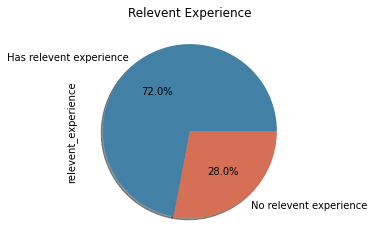

In [26]:
#Plot of relevent_experience
print("Number of Missing Values: ", df['relevent_experience'].isna().sum())
plt.figure(figsize=(4,4))
df['relevent_experience'].value_counts().plot.pie(autopct='%1.1f%%',title ='Relevent Experience',shadow=True,colors=['#4380a5' ,'#d56f56']);

In [27]:
# Plotly code to make interactive plot
fig = px.histogram(data_frame=df,x=df.relevent_experience,color='target')
fig.update_layout(
    title={
        'text':"Relevent Experience",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


* We have more employees with relevant experience 72% and 10,831 of such employees are staying back. 2961 employees are looking for achange.
* All employees with no relevant experience 28% , 3550 will stay in job and 1816 are looking for change.



In [28]:
# Plotly code to make interactive plot
fig = px.scatter(df, x="city", y="city_development_index", color="target",
                title="Relationship between city and city_development_index")
fig.show()

* Purple denotes employees who wants to stay and yellow denotes those who want a change.
* Lets put an imaginary line at 6.2 development index on y axis, Most of the yellow dots are below 6.2 index and purple dots above this line. We have more employees look for a change in cities with low development index. 

* **City development index is an important factor who look for change.**

Number of Missing Values:  0


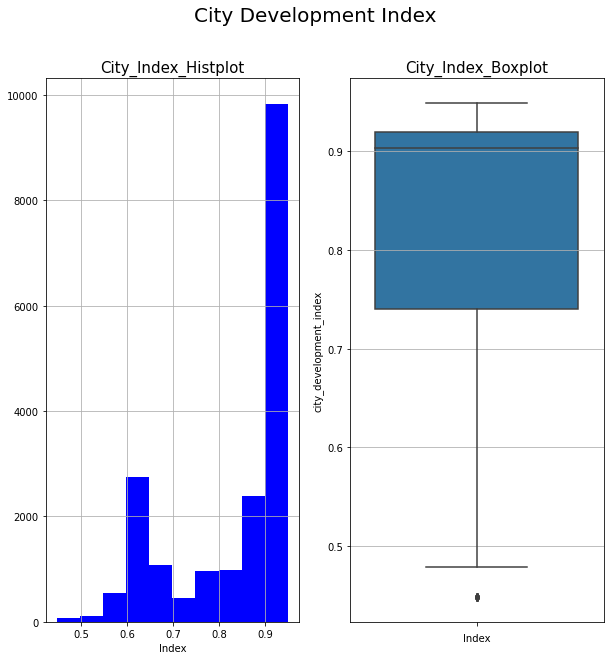

In [29]:
#Plot of City Development Index
print("Number of Missing Values: ", df['city_development_index'].isna().sum())
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
fig.suptitle('City Development Index',size=20)
ax1.set_title('City_Index_Histplot',size=15)
ax1.grid('True')
ax1.set_xlabel('Index',size=10)
ax1.hist(df.city_development_index,color='B')
ax2.set_title('City_Index_Boxplot',size=15)
ax2.grid('True')
ax2.set_xlabel('Index',size=10)
sns.boxplot(y=df.city_development_index,ax=ax2)
plt.show()

In [30]:
# unique value in City
print("Number of Unique Values: ", (df['city'].nunique()))
print("Number of Missing Values: ", df['city'].isna().sum())
# Value Counts of top 10 cities 
print((df['city'].value_counts()[0:10]))

Number of Unique Values:  123
Number of Missing Values:  0
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
Name: city, dtype: int64


Number of Missing Values:  2813


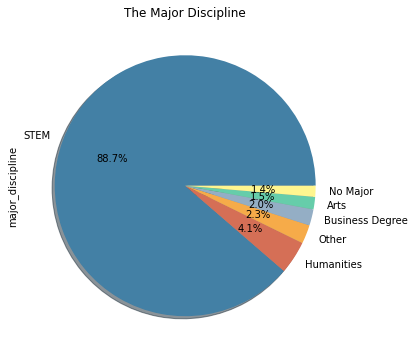

In [31]:
#Plot of major_discipline
print("Number of Missing Values: ", df['major_discipline'].isna().sum())
plt.figure(figsize=(6,6))
df['major_discipline'].value_counts().plot.pie(autopct='%1.1f%%',title ='The Major Discipline',shadow=True,colors=['#4380a5' ,'#d56f56', '#f6ab49', "#94aec5", "#66cdaa","#fff68f"]);

In [32]:
pietrace(df=df, col_name='major_discipline',title="Men vs women:Who will change job more!")


* Most of our employees belongs to STEM majors. This is definitely a great contribution to work force. 10,000 of such employees are going to stay in job while 3000 of such are looking for a change.
* Other majors are very few in numbers. Most of the data scientists have STEM background are good in knowledge in general.

Number of Missing Values:  0


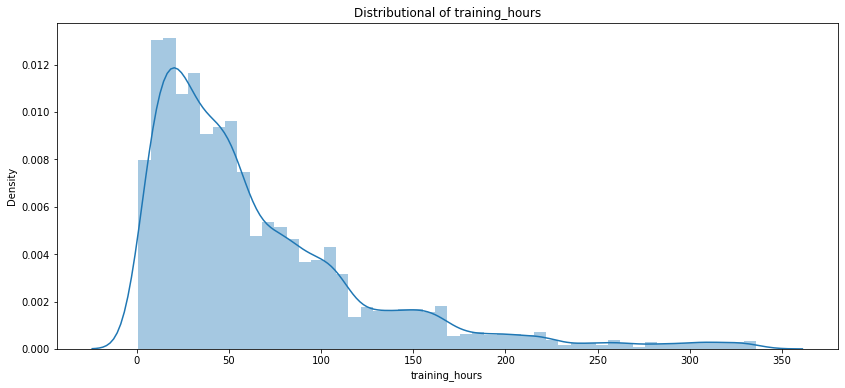

In [33]:
#Plot of training_hours
print("Number of Missing Values: ", df['training_hours'].isna().sum())
plt.figure(figsize=(14,6))
sns.distplot(df.training_hours).set_title("Distributional of training_hours");

Training Hour distribution is Right Skwed and Majority of Candidates spent less than 100 Hours on Training

Number of Missing Values:  460


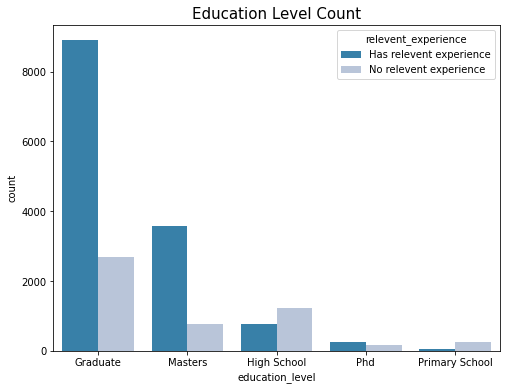

In [34]:
#Plot of education_level
print("Number of Missing Values: ", df['education_level'].isna().sum())
plt.figure(figsize=(8,6))
sns.countplot(df['education_level'], hue=df.relevent_experience, palette="PuBu_r").set_title('Education Level Count', fontsize=15);

More number of Graduates with Relevent Experience. we can say that Company don't give more Chance to Freshers.

Number of Missing Values:  65


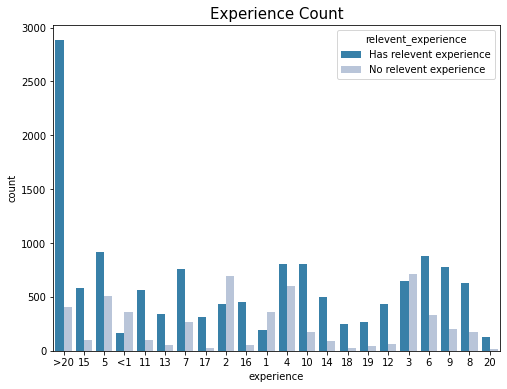

In [35]:
#Plot of experience
print("Number of Missing Values: ", df['experience'].isna().sum())
plt.figure(figsize=(8,6))
sns.countplot(df['experience'], hue=df.relevent_experience, palette="PuBu_r").set_title('Experience Count', fontsize=15);

Number of Missing Values:  5938


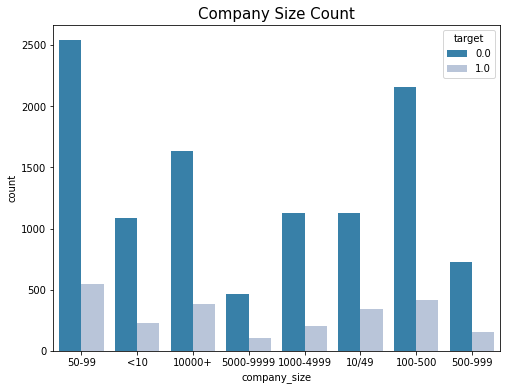

In [36]:
#Plot of company_size
print("Number of Missing Values: ", df['company_size'].isna().sum())
plt.figure(figsize=(8,6))
sns.countplot(df['company_size'], hue=df.target, palette="PuBu_r").set_title('Company Size Count', fontsize=15);

Number of Missing Values:  6140


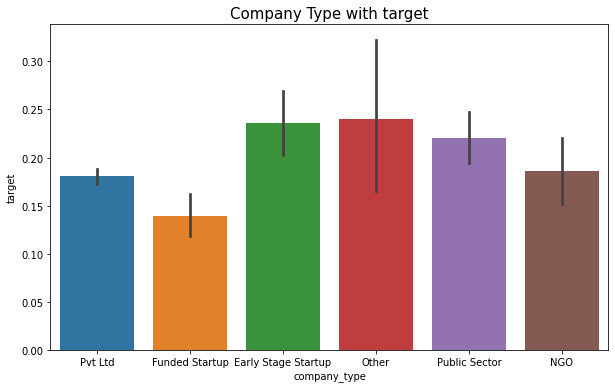

In [37]:
#Plot of company_type
print("Number of Missing Values: ", df['company_type'].isna().sum())
plt.figure(figsize=(10,6))
sns.barplot(x='company_type', y='target', data=df).set_title('Company Type with target', fontsize=15);

In [38]:
# unique value in last_new_job
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [39]:
# value counts in last_new_job
df.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

# Prepare the data Data Preprocessing


## Unnecessary columns



I consider that this columns are not useful to use as feature,therefore I delete it

In [40]:
# Remove enrollee_id from data
df.drop('enrollee_id', inplace=True, axis=1)

## Deal with NaN values and Encode Categorical Features

In [41]:
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [42]:
# Prepare the data for lambda and encode
df1=copy.deepcopy(df)
cols=['city_development_index','training_hours','target']
for i in df1.columns:
    if i not in cols:
        df1[i]=df1[i].map(str)
df1.drop(columns=cols,inplace=True)

Working with catagorical features is difficult, especialy when using One-Hot Encoding, this leads to a messy dataframe and longer computational. This is why I opt for Label Encoding.

In [43]:
d = defaultdict(LabelEncoder)
df1 = df1.apply(lambda x: d[x.name].fit_transform(x))

In [44]:
df1[cols]=df[cols]
df = df1.copy()

In [45]:
df.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,5,1,0,3,0,5,21,8,6,0,0.920,36,1.0
1,77,1,1,3,0,5,6,4,5,4,0.776,47,0.0
2,64,3,1,0,0,5,15,8,6,6,0.624,83,0.0
3,14,3,1,2,0,1,20,8,5,6,0.789,52,1.0
4,50,1,0,3,2,5,21,4,1,3,0.767,8,0.0


In [46]:
df.shape

(19158, 13)

In [47]:
df.isna().sum()

city                      0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
city_development_index    0
training_hours            0
target                    0
dtype: int64

## Feature Selection

**Correlation in Data**

In [48]:
df.corr()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
city,1.000000,0.049546,0.006154,-0.079245,0.006448,0.105038,-0.042545,0.026963,0.019465,0.001763,-0.326104,0.009537,0.056233
gender,0.049546,1.000000,0.099137,-0.104901,0.059195,0.065875,0.001815,0.061470,0.044373,0.067027,-0.154868,0.001057,0.067676
relevent_experience,0.006154,0.099137,1.000000,-0.375810,0.111214,0.095723,-0.008235,0.343754,0.188282,0.228555,-0.059808,-0.011566,0.128430
enrolled_university,-0.079245,-0.104901,-0.375810,1.000000,0.056155,-0.146363,0.024657,-0.208255,-0.093797,-0.050627,0.171612,0.002530,-0.149475
education_level,0.006448,0.059195,0.111214,0.056155,1.000000,0.190048,0.015183,0.084057,0.036840,0.121864,0.039749,-0.005852,-0.075754
major_discipline,0.105038,0.065875,0.095723,-0.146363,0.190048,1.000000,-0.004304,0.073814,0.059102,0.096016,-0.101260,0.007497,-0.005513
experience,-0.042545,0.001815,-0.008235,0.024657,0.015183,-0.004304,1.000000,0.029439,0.017863,0.056310,0.035141,-0.005202,-0.006335
company_size,0.026963,0.061470,0.343754,-0.208255,0.084057,0.073814,0.029439,1.000000,0.341661,0.194668,-0.056537,-0.003124,0.186114
company_type,0.019465,0.044373,0.188282,-0.093797,0.036840,0.059102,0.017863,0.341661,1.000000,0.171732,-0.030946,-0.013025,0.118226
last_new_job,0.001763,0.067027,0.228555,-0.050627,0.121864,0.096016,0.056310,0.194668,0.171732,1.000000,-0.024093,-0.012885,-0.001687


**Heatmap**

In [49]:
# Plotly code to make a heatmap
x=list(df.corr().columns)
y=list(df.corr().index)
values=np.array(df.corr().values)

fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
                   
    
                   hoverongaps = False))
fig.update_layout(
    title={
        'text': "Correlation between features",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**Conclusion**: From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means candidates from city with higher amount of development index don't tend to change their jobs (corr is negative).



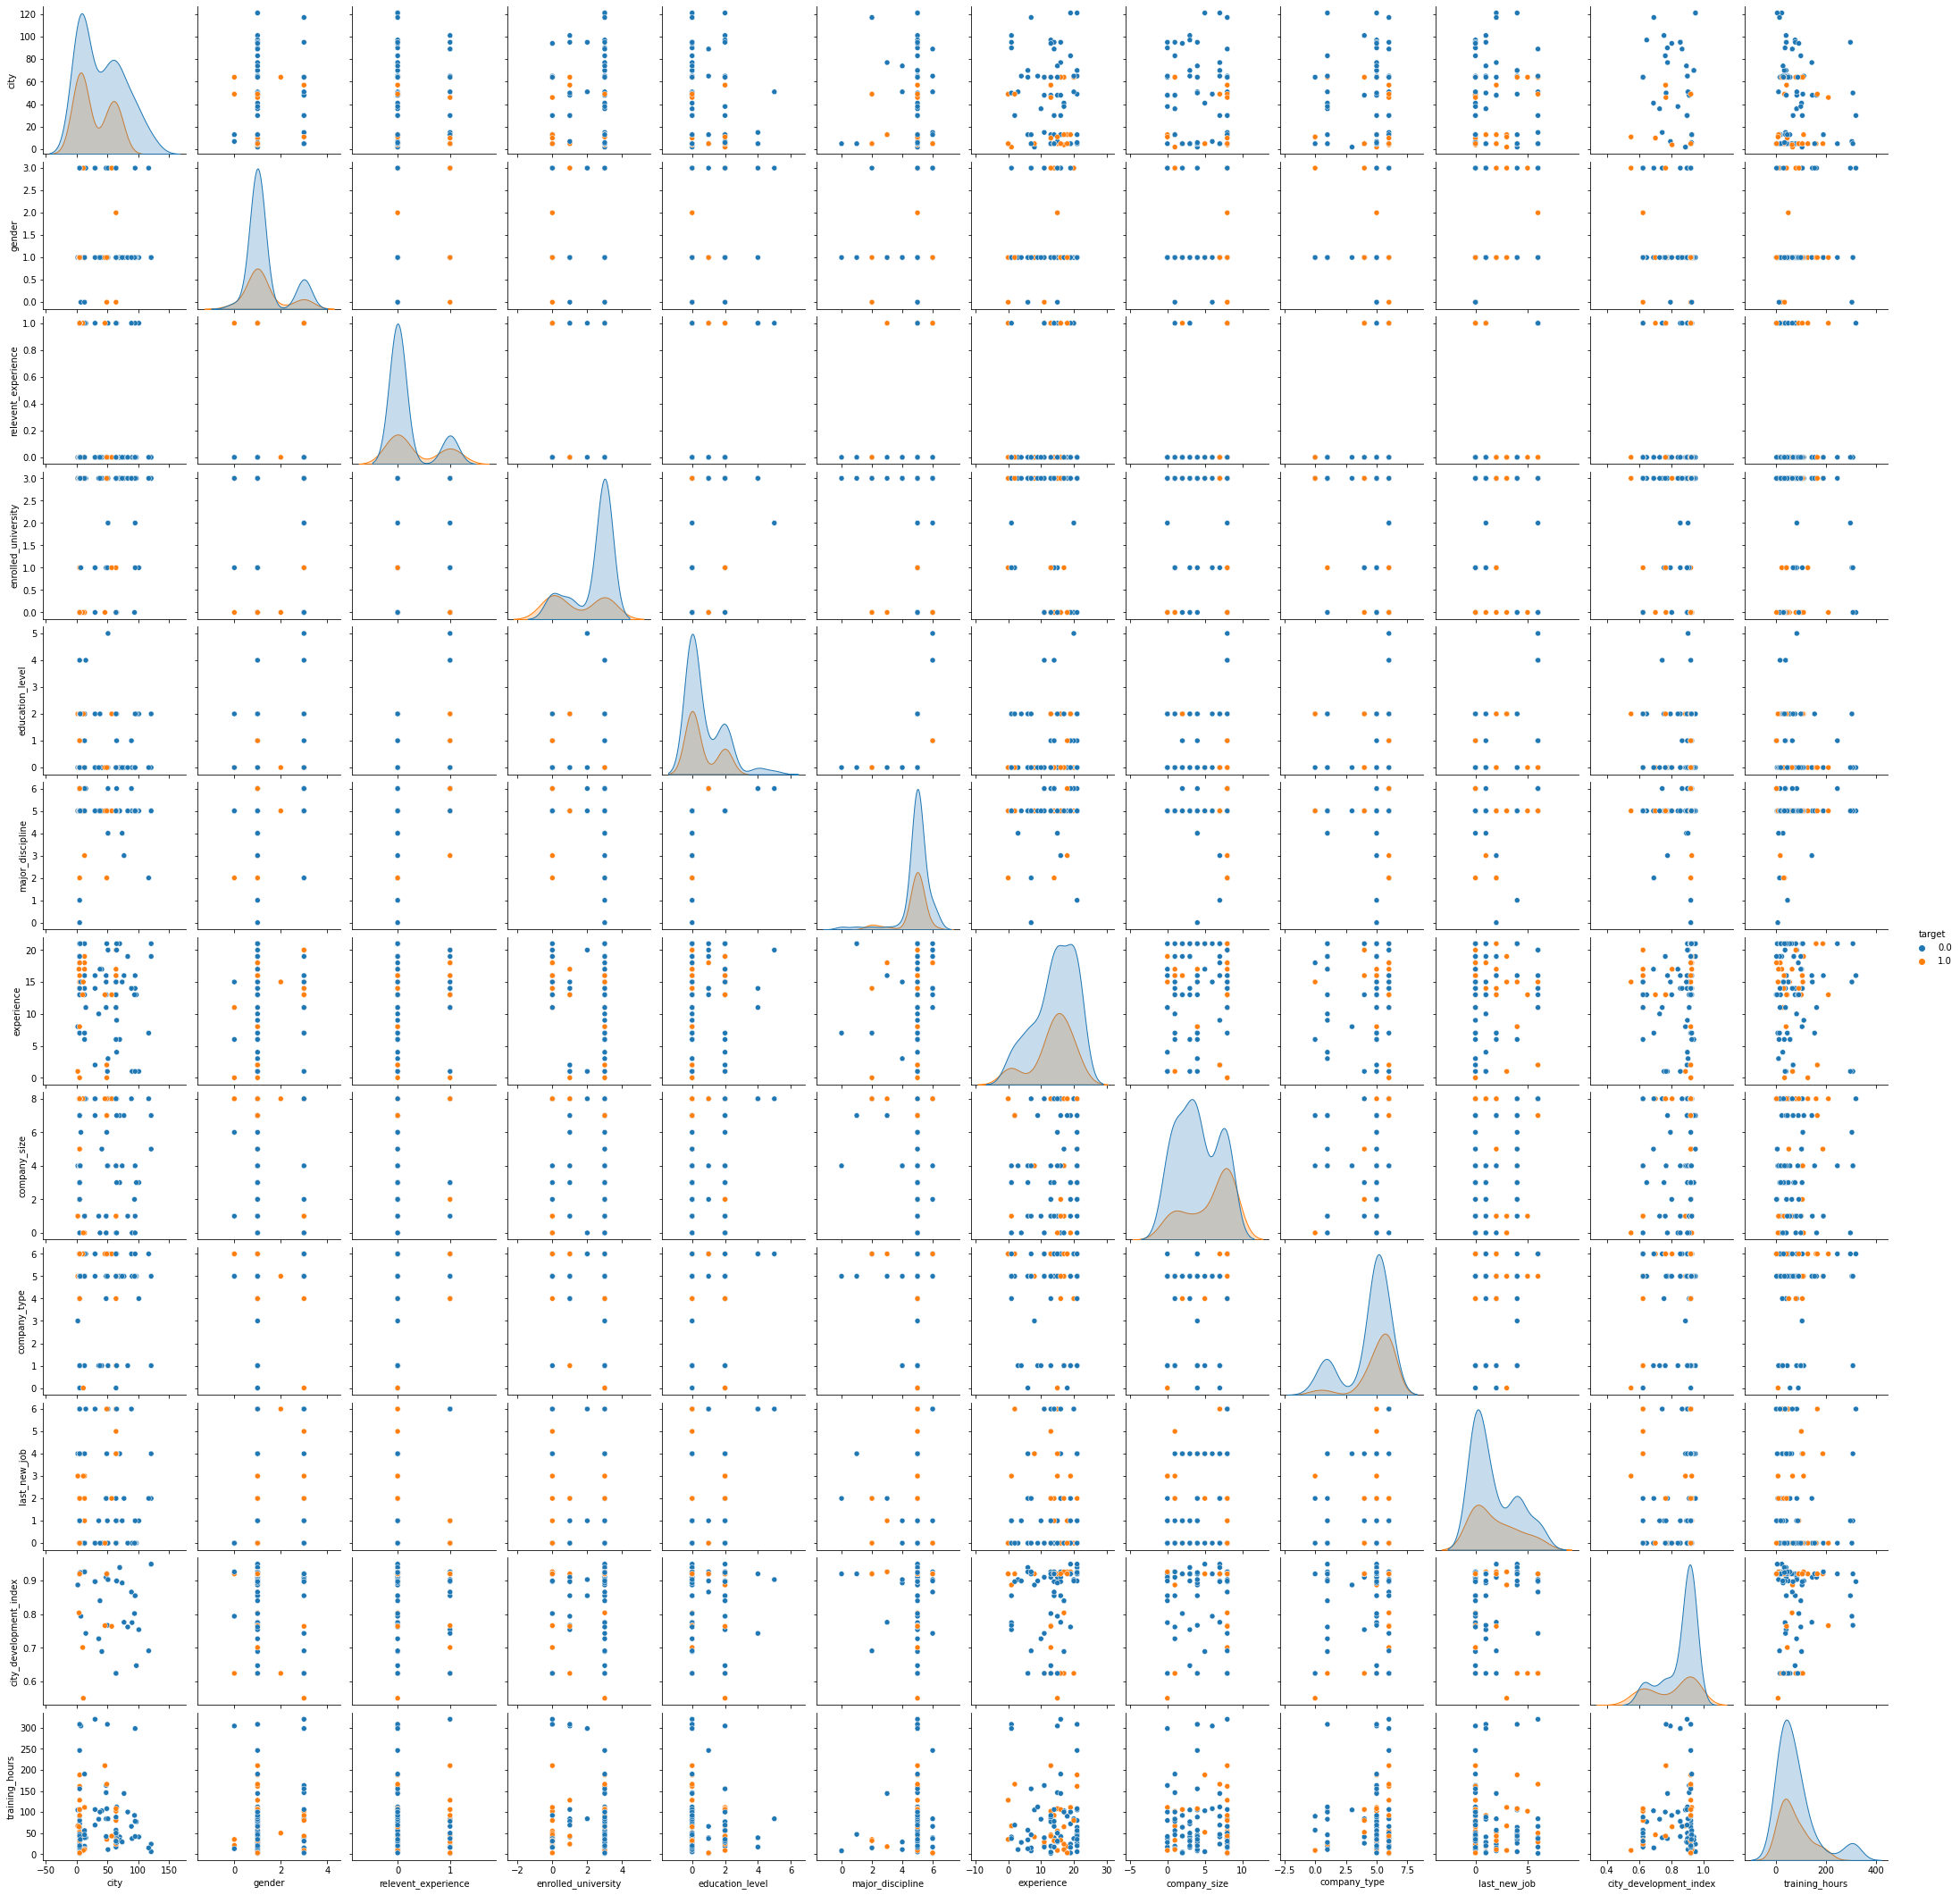

In [50]:
sns.pairplot(data=df.sample(100),hue='target')

In [51]:
# Selecting top 10 features from the data (use "k=10" are the best num that fit to my models)
p=SelectKBest(score_func=f_classif,k=10)
fit=p.fit(df.drop(columns=['target']),df['target'])

In [52]:
features=fit.transform(df.drop(columns=['target']))
print(features[:5,:])
df.head()

[[ 5.     1.     0.     3.     0.    21.     8.     6.     0.92  36.   ]
 [77.     1.     1.     3.     0.     6.     4.     5.     0.776 47.   ]
 [64.     3.     1.     0.     0.    15.     8.     6.     0.624 83.   ]
 [14.     3.     1.     2.     0.    20.     8.     5.     0.789 52.   ]
 [50.     1.     0.     3.     2.    21.     4.     1.     0.767  8.   ]]


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,5,1,0,3,0,5,21,8,6,0,0.920,36,1.0
1,77,1,1,3,0,5,6,4,5,4,0.776,47,0.0
2,64,3,1,0,0,5,15,8,6,6,0.624,83,0.0
3,14,3,1,2,0,1,20,8,5,6,0.789,52,1.0
4,50,1,0,3,2,5,21,4,1,3,0.767,8,0.0


The 10 features that are selected are :
*   city
*   city_development_index
*   gender
*   relevent_experience
*   enrolled_university
*   education_level
*   experience
*   company_size
*   company_type
*   training_hours


**Splitting the data**

In [53]:
X=df[["city" , "city_development_index","gender","relevent_experience","enrolled_university","education_level","experience","company_size","company_type", "training_hours"]]
y=df['target']


In [54]:
# When I select best features, It better than select all features
# X=df.drop('target', axis = 1)
# y=df['target'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Models

#### Determine the baseline model accuracy

In [56]:
# create baseline model 
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

In [57]:
n_predictions = len(y_test)  # how many predictions to make? '3832'
baseline_value =pd.Series(y_train).value_counts().index[0]  # what value to predict? (classification = most common class '0.0')
baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3827    0.0
3828    0.0
3829    0.0
3830    0.0
3831    0.0
Length: 3832, dtype: float64

In [58]:
baseline_acc=accuracy_score(y_test, baseline_preds) #Accuracy score of baseline model 
print('The baseline model accuracy score is :',baseline_acc)

The baseline model accuracy score is : 0.7515657620041754


#### RandomForestClassifier Model

In [59]:
# create and fit RandomForestClassifier model  
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
#predict
pred = rfc.predict(X_test)
pred

array([0., 0., 0., ..., 0., 1., 0.])

In [61]:
rfc_acc= accuracy_score(y_test, pred)
print('The accuracy score using the RandomForestClassifier (befor resample) is :',rfc_acc)

The accuracy score using the RandomForestClassifier (befor resample) is : 0.778705636743215


In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2880
         1.0       0.57      0.46      0.51       952

    accuracy                           0.78      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.77      0.78      0.77      3832



## Oversampling using SMOTE

**The target feature is clearly imbalanced,The distribution of target has a lot more samples in '0' than in '1'.**

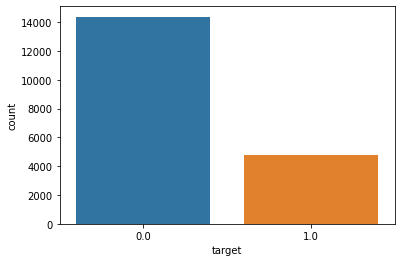

In [63]:
sns.countplot(df['target']);

**Let's try to increase data in balanced manner using Synthetic Minority Oversampling Technique (SMOTE)**

In [64]:
smote=SMOTE(random_state=60)
X, y=smote.fit_resample(X,y)

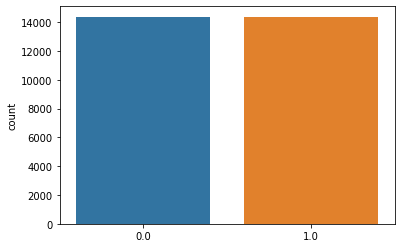

In [65]:
sns.countplot(y);

**Now the number of samples per class in target are equal, so the predictor can have a higher accuracy.**

Data Balanced Successfully 

**Splitting the data after SMOTE**

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### RandomForestClassifier Model

In [67]:
## create and fit RandomForestClassifier model after SMOTE
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
#predict
pred = rfc.predict(X_test)
pred

array([0., 0., 0., ..., 1., 1., 0.])

In [69]:
rfc_acc= accuracy_score(y_test, pred)
print('The accuracy score using the RandomForestClassifier (after resample) is :',rfc_acc)

The accuracy score using the RandomForestClassifier (after resample) is : 0.8567703806709542


In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2877
         1.0       0.87      0.84      0.85      2876

    accuracy                           0.86      5753
   macro avg       0.86      0.86      0.86      5753
weighted avg       0.86      0.86      0.86      5753



#### DecisionTreeClassifier Model

In [71]:
# create and fit DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
#predict
pred = dtc.predict(X_test)
pred

array([0., 0., 0., ..., 1., 1., 0.])

In [73]:
dtc_acc= accuracy_score(y_test, pred)
print('The accuracy score with using the decision tree classifier is :',dtc_acc)

The accuracy score with using the decision tree classifier is : 0.8053189640187728


In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      2877
         1.0       0.80      0.81      0.81      2876

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753



#### KNeighborsClassifier Model

In [75]:
# create and fit KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [76]:
#predict
pred = knn.predict(X_test)

In [77]:
#KNN accuracy score

Knn_acc= accuracy_score(y_test, knn.predict(X_test))
print('The accuracy socre using the KNeighborsClassifier is :',Knn_acc)

The accuracy socre using the KNeighborsClassifier is : 0.7855032157135408


In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.76      2877
         1.0       0.73      0.91      0.81      2876

    accuracy                           0.79      5753
   macro avg       0.80      0.79      0.78      5753
weighted avg       0.80      0.79      0.78      5753



## Evaluation

**Comparing Model Accuracy**

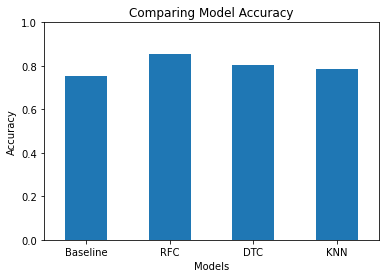

In [79]:
pd.DataFrame([baseline_acc, rfc_acc, dtc_acc, Knn_acc]).plot.bar();
plt.xticks(np.arange(4),('Baseline','RFC','DTC','KNN'))
plt.legend().remove()
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');
# plt.savefig("abc.png")
# files.download("abc.png")

**My models has better accuracy than baseline model. That's good!**

Although it is clear which model is more successfull. I like to look at their Confusion Matrix and ROC curves to be sure.

**Confusion Matrix**

This takes values and returns a report showing how each of the test values predicted classes compare to their actual classes.

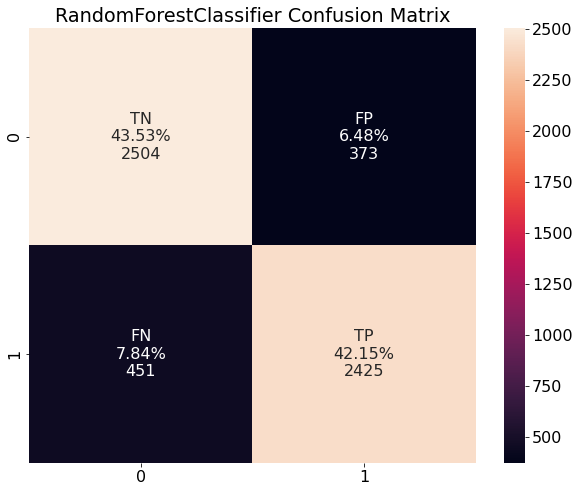

In [80]:
#RandomForestClassifier confusion matrix
y_pred = rfc.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("RandomForestClassifier Confusion Matrix");
# plt.savefig("abc.png")
# files.download("abc.png")

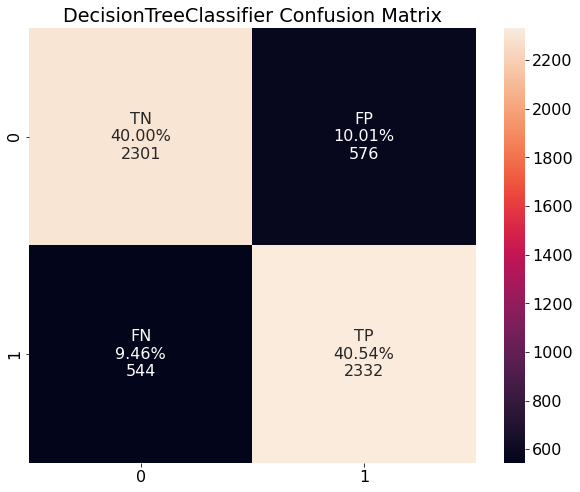

In [81]:
#DecisionTreeClassifier confusion matrix
y_pred = dtc.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("DecisionTreeClassifier Confusion Matrix");

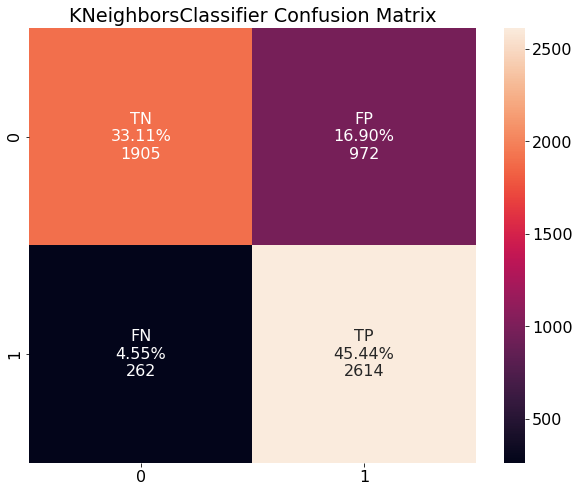

In [82]:
#KNeighborsClassifier confusion matrix
y_pred = knn.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("KNeighborsClassifier Confusion Matrix");

**ROC/AUC curve**

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis.

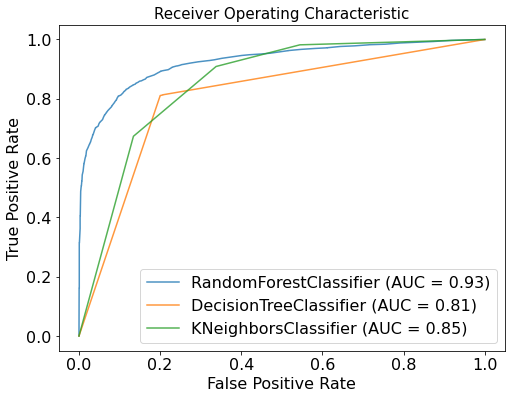

In [83]:
# ROC/AUC curve
plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_title('Receiver Operating Characteristic',size=15)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8, name='RandomForestClassifier')
tree_disp = plot_roc_curve(dtc, X_test, y_test,  ax=ax, alpha=0.8, name='DecisionTreeClassifier')
knn_disp =  plot_roc_curve(knn, X_test, y_test,  ax=ax, alpha=0.8, name='KNeighborsClassifier')
# plt.savefig("abc.png")
# files.download("abc.png")

**Random Forest Classifier seem to be the most successful out of them**

True Positive Rate = True Positives / (True Positives + False Negatives)

False Positive Rate = False Positives / (False Positives + True Negatives)

## Hyperparameter

Perform GridSearchCV with the better data for Random Forest Classifier 

In [90]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [85]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [91]:
# show best params
print('Best Hyperparameters:')
CV_rfc.best_params_

Best Hyperparameters:


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

Create and fit a RandomForestClassifier model with the results of GridSerachCV

In [93]:
#RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'gini',
 max_depth= 8,
 max_features= 'auto',
 n_estimators= 200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
#predict
pred = rfc.predict(X_test)
pred

array([0., 0., 0., ..., 1., 1., 0.])

In [95]:
rfc_acc= accuracy_score(y_test, pred)
print('The accuracy using the RandomForestClassifier with Hyperparameters is :',rfc_acc)

The accuracy using the RandomForestClassifier with Hyperparameters is : 0.8399096123761516


The rate of accuracy score not getting better

# Summary

I have applied three different machine learning methods to the data. Random Forest Classifier seem to be the most successful out of them. Random Forest achieved 0.86 accuracy score and 0.93 AUC scores. Analyzing the ROC curve which visualizes True Positivity Rate vs False Positive Rate for every threshold we can give the classifier,  Which it is perfect and I think we can call it a successful classification.

According to my approach in selecting feature importance we can see 'city_development_index', 'company_size' are most important factor in hob changes. Data scientists in cities with better development index which work in higher size of company don't tend to change their jobs.

**I hope you had a good time reading my notebook, Thank you for reading my notebook. :)**

**Resources**

[Code Examples](https://www.codegrepper.com/code-examples/python)

[Encoding Categorical Variables](https://kiwidamien.github.io/encoding-categorical-variables.html)

[oversampling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

[Handling Imbalance](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)

[Plotly](https://chart-studio.plotly.com/feed/#/)


